# Imports

In [151]:
import numpy as np
import pandas as pd

In [152]:
import matplotlib.pyplot as plt

# Global variables

Переменные для вычисления (шаг и т. д.)

In [153]:
time_step = 1  # Шаг в годах
additional_prognosis_years = 0


def get_time_array(start: int, end: int, step: float) -> np.ndarray:
    return np.arange(start, end + step, step)

# Funcs

## Math

In [154]:
def malthus_model(t: float, P0: float, r: float) -> float:
    """Вычисляет популяцию по модели Мальтуса.

    Args:
        t (float): Время.
        P0 (float): Начальная численность.
        r (float): Коэффициент роста.

    Returns:
        float: Численность популяции в момент t.
    """
    return P0 * np.exp(r * t)


def logistic_model(t: float, P0: float, r: float, K: float) -> float:
    """Вычисляет популяцию по логистической модели.

    Args:
        t (float): Время.
        P0 (float): Начальная численность.
        r (float): Коэффициент роста
        K (float): Ёмкость среды.

    Returns:
        float: Численность популяции в момент t.
    """
    return (K * P0 * np.exp(r * t)) / (K - P0 + P0 * np.exp(r * t))


def malthus_calc_r(t: float, P0: float, P: float) -> float:
    """Калькуляция r по Мальтусу

    Args:
        t (float): Разница по времени
        P0 (float): Начальное значение
        P (float): Конечное значение

    Returns:
        float: r
    """
    return 1 / t * np.log(P / P0)


def logistic_calc_r(t: float, P0: float, P: float, K: float) -> float:
    """Калькуляция r по логистической

    Args:
        t (float): Разница по времени
        P0 (float): Начальное значение
        P (float): Конечное значение

    Returns:
        float: r
    """
    return 1 / t * np.log((np.array(P) * (-(np.array(P0) - K))) / (np.array(P0) * (K - np.array(P))))

## Graphics

In [155]:
def plot_population(
    t: float,
    P: float,
    label_model: str,
    t_observed: float = None,
    P_observed: float = None,
) -> None:
    """Построение графика популяции

    Args:
        t (float): Время прогноза.
        P (float): Прогноз.
        label_model (str): Наименование модели
        t_observed (float, optional): Время наблюдений. Defaults to None.
        P_observed (float, optional): Наблюдения. Defaults to None.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(t, P, "b-", linewidth=2, label=label_model)
    if t_observed is not None and P_observed is not None:
        plt.plot(
            t_observed, P_observed, "ro", markersize=6, label="Оригинальные данные"
        )
    plt.xlabel("Время")
    plt.ylabel("Численность популяции")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# China (Malthus)

## Data check

Последняя строка проверочная

In [156]:
df_china = pd.read_csv("../data/china.csv", index_col=0, dtype={"persons": "int"})
china_person_multiplier = int(1e3)

df_china

,persons,birth_rate,death_rate,natural_rate
year,,,,
2014,1371860,13.83,7.12,6.71
2015,1379860,11.99,7.07,4.93
2016,1387790,12.95,7.09,5.86
2017,1396215,12.64,7.06,5.58
2018,1402760,10.86,7.08,3.78
2019,1407745,10.41,7.09,3.32
2020,1411100,8.52,7.07,1.45


In [157]:
r_china_malthus_list = malthus_calc_r(df_china.index[1:] - df_china.index[0], [df_china.persons.iloc[0]]* (len(df_china) - 1), df_china.persons[1:].values)

In [158]:
r_china_malthus = np.mean(r_china_malthus_list)

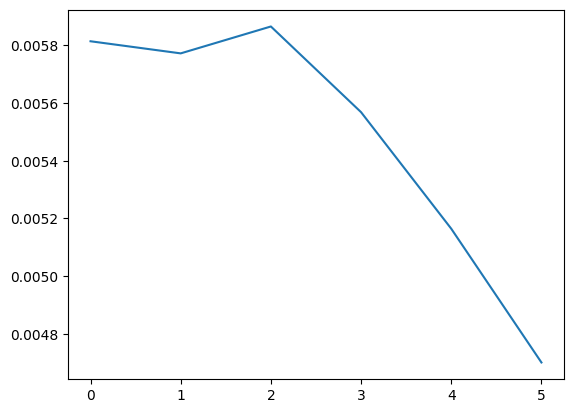

In [159]:
plt.plot(r_china_malthus_list)
plt.show()

In [160]:
calc_idx_china = 0

china_timeline = df_china.index
china_population_timeline = df_china["persons"]

starting_year_china = china_timeline[calc_idx_china]
predict_idx_china = [i for i in range(1, len(df_china))]
interval_len_china = len(df_china) - 1

birth_rate_mean_china = df_china["birth_rate"].mean()
death_rate_mean_china = df_china["death_rate"].mean()
natural_rate_mean_china = df_china["natural_rate"].mean()

In [161]:
P0_china = df_china["persons"].iloc(0)[0]

In [162]:
r_china_malthus


np.float64(0.005481028400539223)

## Calculation

### Malthus

In [163]:
t_china = get_time_array(
    starting_year_china - starting_year_china,
    df_china.index[predict_idx_china[-1]] - starting_year_china + additional_prognosis_years,
    time_step,
)
P_malthus_china = malthus_model(
    t_china,
    P0_china,
    r_china_malthus,
)
P_malthus_china

array([1371860.        , 1379399.84780575, 1386981.13519348,
       1394604.08991831, 1402268.94098712, 1409975.91866543,
       1417725.25448433])

In [164]:
df_malthus_china = pd.DataFrame({"year": t_china + starting_year_china, "persons": P_malthus_china})
df_malthus_china.set_index("year", inplace=True)
df_malthus_china

,persons
year,
2014,1.371860e+06
2015,1.379400e+06
2016,1.386981e+06
2017,1.394604e+06
2018,1.402269e+06
2019,1.409976e+06
2020,1.417725e+06


In [165]:
china_population_timeline

year
2014    1371860
2015    1379860
2016    1387790
2017    1396215
2018    1402760
2019    1407745
2020    1411100
Name: persons, dtype: int64

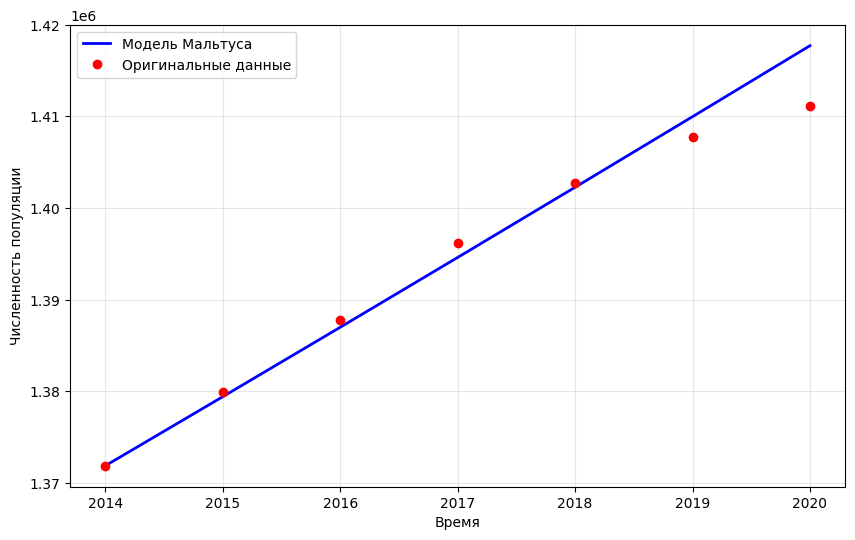

In [166]:
plot_population(t_china + starting_year_china, P_malthus_china, "Модель Мальтуса", china_timeline, china_population_timeline)

### Logistic

In [ ]:
K_china = 1412360

In [ ]:
r_china_logistic_list = logistic_calc_r(df_china.index[1:] - df_china.index[0], [df_china.persons.iloc[0]]* (len(df_china) - 1), df_china.persons[1:].values, K_china)

In [169]:
r_china_logistic = np.mean(r_china_logistic_list)

In [187]:
r_china_logistic_list

Index([0.22587644624337813, 0.25566042905333936, 0.31242969685478583,
        0.3654532792088563, 0.43956235125122173,  0.5830653853249727],
      dtype='float64', name='year')

In [170]:
r_china_logistic

np.float64(0.36367459798942564)

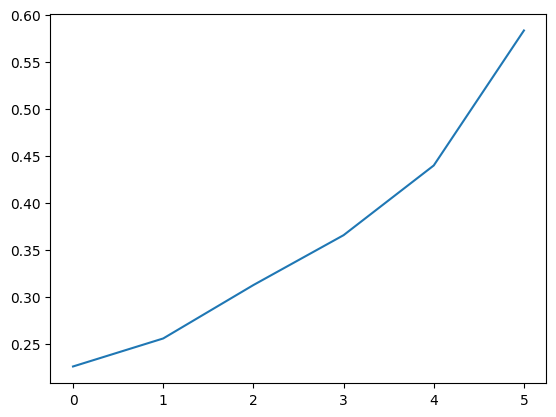

In [171]:
plt.plot(r_china_logistic_list)
plt.show()

In [ ]:
t_china = get_time_array(
    starting_year_china - starting_year_china,
    df_china.index[predict_idx_china[-1]] - starting_year_china + additional_prognosis_years,
    time_step,
)
P_logistic_china = logistic_model(
    t_china,
    P0_china,
    r_china_logistic,
    K_china,
)
P_logistic_china

array([1371860.        , 1383959.45168928, 1392496.50788303,
       1398493.08226984, 1402691.92430401, 1405625.49777298,
       1407671.91530346])

In [173]:
df_logistic_china = pd.DataFrame(
    {"year": t_china + starting_year_china, "persons": P_logistic_china}
)
df_logistic_china.set_index("year", inplace=True)
df_logistic_china

,persons
year,
2014,1.371860e+06
2015,1.383959e+06
2016,1.392497e+06
2017,1.398493e+06
2018,1.402692e+06
2019,1.405625e+06
2020,1.407672e+06


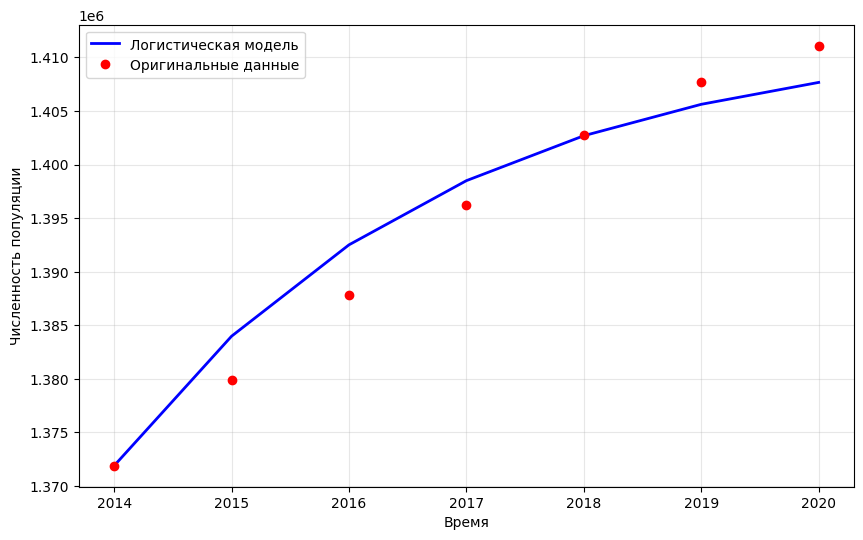

In [174]:
plot_population(
    t_china + starting_year_china,
    P_logistic_china,
    "Логистическая модель",
    china_timeline,
    china_population_timeline,
)

# Kazahstan

## Data check

In [175]:
df_kaz = pd.read_csv("../data/kazahstan.csv", index_col=0, dtype={"persons": "int"})
kaz_person_multiplier = int(1e3)

df_kaz

,persons,birth_rate,death_rate,natural_rate
year,,,,
2014,17289,23.10,7.6,15.5
2015,17557,22.70,7.5,16.2
2016,17818,22.52,7.4,15.6
2017,18014,21.70,7.2,14.4
2018,18437,21.80,7.1,14.7
2019,18789,21.80,7.2,14.6
2020,18129,22.80,8.7,14.1


In [176]:
calc_idx_kaz = 0

kaz_timeline = df_kaz.index
kaz_population_timeline = df_kaz["persons"]

starting_year_kaz = kaz_timeline[calc_idx_kaz]
predict_idx_kaz = [i for i in range(1, len(df_kaz))]
interval_len_kaz = len(df_kaz) - 1

birth_rate_mean_kaz = df_kaz["birth_rate"].mean()
death_rate_mean_kaz = df_kaz["death_rate"].mean()
natural_rate_mean_kaz = df_kaz["natural_rate"].mean()

In [177]:
P0_kaz = df_kaz["persons"].iloc(0)[0]
# r_kaz = natural_rate_mean_kaz / 100

In [ ]:
K_china = 1412360

In [ ]:
r_kaz_logistic_list = logistic_calc_r(df_kaz.index[1:] - df_kaz.index[0], [df_kaz.persons.iloc[0]]* (len(df_kaz) - 1), df_kaz.persons[1:].values, K_china)

In [180]:
r_kaz_logistic = np.mean(r_kaz_logistic_list)

In [186]:
r_kaz_logistic_list

Index([0.015574393036903401, 0.015258992628745548, 0.013866198044848368,
        0.01627807247931027,  0.01685538472782931, 0.008007451027329821],
      dtype='float64', name='year')

In [181]:
r_kaz_logistic

np.float64(0.01430674865749445)

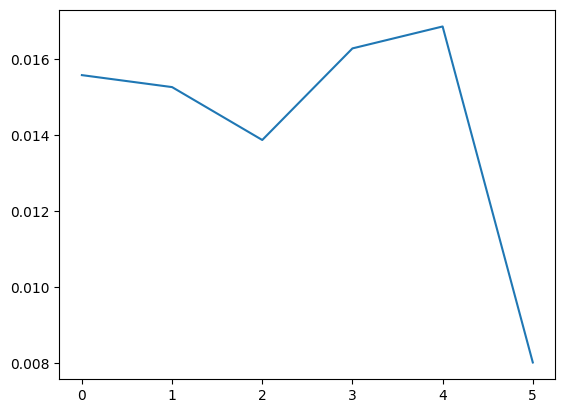

In [182]:
plt.plot(r_kaz_logistic_list)
plt.show()

## Calculation

### Logistic

In [183]:
t_kaz = get_time_array(
    starting_year_kaz - starting_year_kaz,
    df_kaz.index[predict_idx_kaz[-1]] - starting_year_kaz + additional_prognosis_years,
    time_step,
)
P_logistic_kaz = logistic_model(
    t_kaz,
    P0_kaz,
    r_kaz_logistic,
    int(1e6),
)
P_logistic_kaz

array([17289.        , 17533.75909172, 17781.92052077, 18033.52979552,
       18288.63298218, 18547.27671011, 18809.50817723])

In [184]:
df_logistic_kaz = pd.DataFrame({"year": t_kaz + starting_year_kaz, "persons": P_logistic_kaz})
df_logistic_kaz.set_index("year", inplace=True)
df_logistic_kaz

,persons
year,
2014,17289.000000
2015,17533.759092
2016,17781.920521
2017,18033.529796
2018,18288.632982
2019,18547.276710
2020,18809.508177


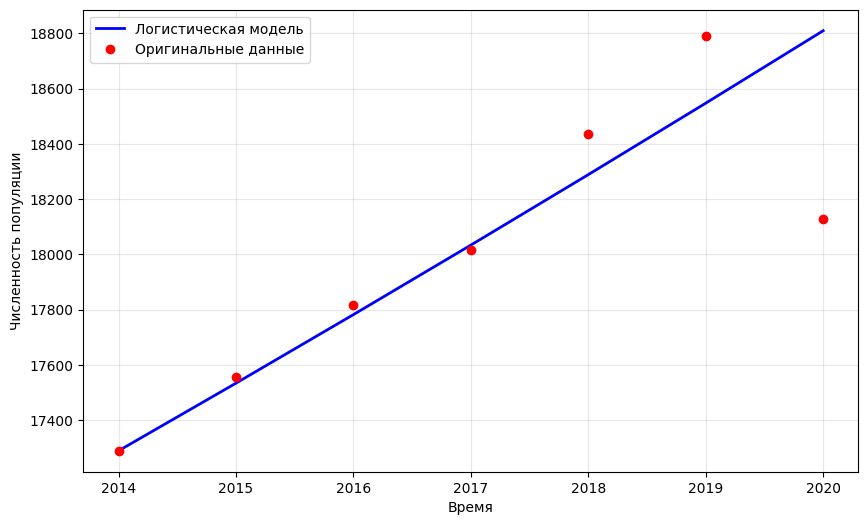

In [185]:
plot_population(
    t_kaz + starting_year_kaz,
    P_logistic_kaz,
    "Логистическая модель",
    kaz_timeline,
    kaz_population_timeline,
)